In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('C:\\Users\\Hp\\Desktop\\Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head()
df.columns = df.columns.str.lower()

In [5]:
df.drop(columns = ['rownumber', 'customerid', 'surname'], inplace = True)

In [6]:
# one-hot encoding categorical values 
cat = ['geography', 'gender']

def one_hot(data, col):
    for _ in col:
        data[_] = pd.Categorical(df[_]).codes
    return data 

In [7]:
df = one_hot(df, cat)

In [8]:
df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  int8   
 2   gender           10000 non-null  int8   
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 722.8 KB


In [10]:
df.describe(include = 'all')

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.isna().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [12]:
def disp_heatmap(df):
    df_corr = df.corr()['exited']
    sns.heatmap(df_corr.to_frame(), annot = True, fmt = '.5f', cmap = 'coolwarm')

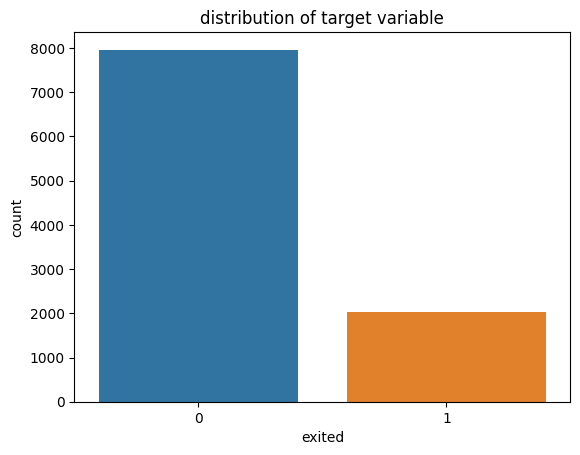

In [13]:
sns.countplot(data = df, x = 'exited')
plt.title('distribution of target variable')
plt.show()

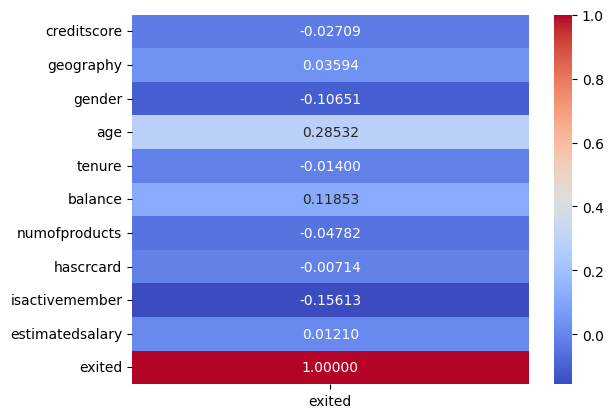

In [14]:
disp_heatmap(df)

In [15]:
exit = df[df['exited']==1]
stay = df[df['exited']==0]
print('Stayed : ', stay.count()[0])
print('Exited : ', exit.count()[0])

Stayed :  7963
Exited :  2037


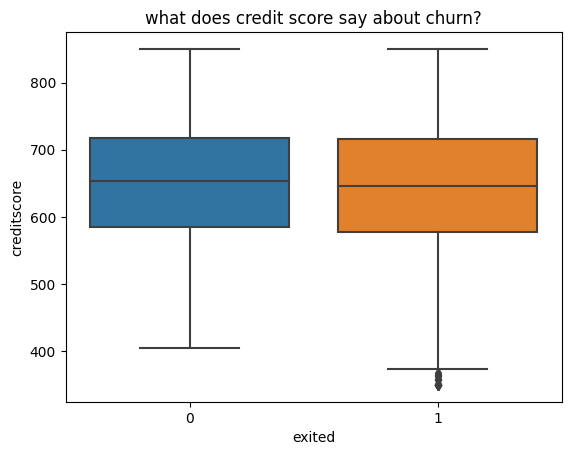

In [16]:
sns.boxplot(x = 'exited',y = 'creditscore', data = df)
plt.title('what does credit score say about churn?')
plt.show()

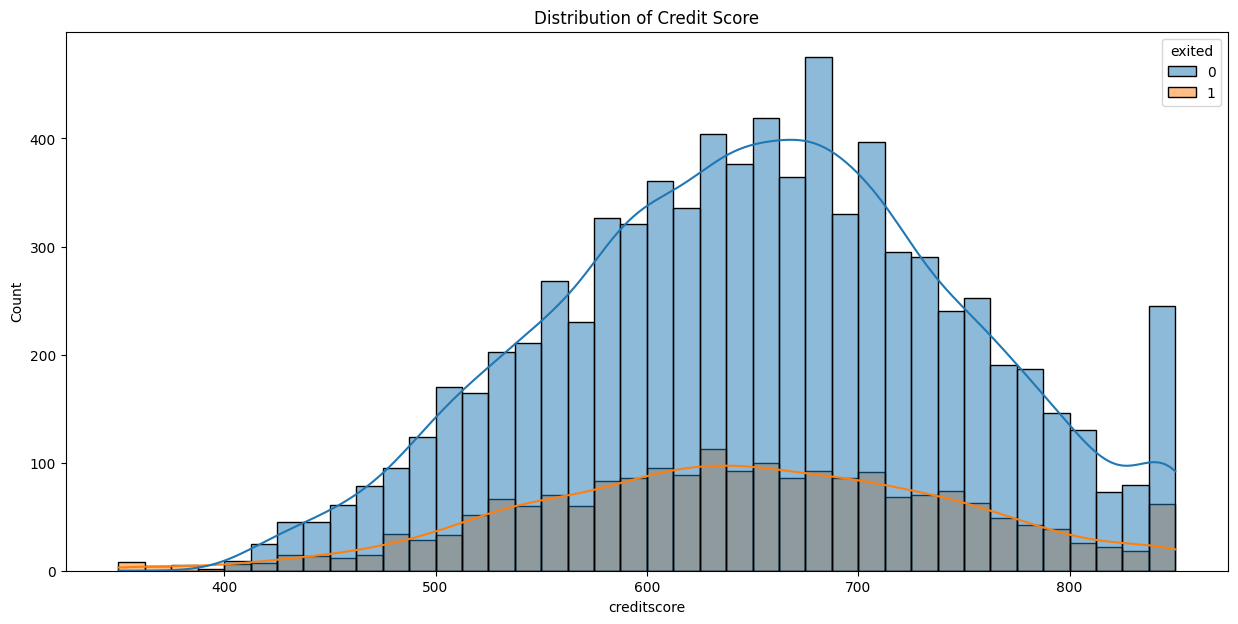

In [17]:
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'creditscore', hue = 'exited', kde= True, bins = 40 )
plt.title('Distribution of Credit Score')
plt.show()

In [18]:
stay_resample = resample(stay, n_samples = exit.count()[0], replace = False, random_state = 42)
df = pd.concat([stay_resample, exit])

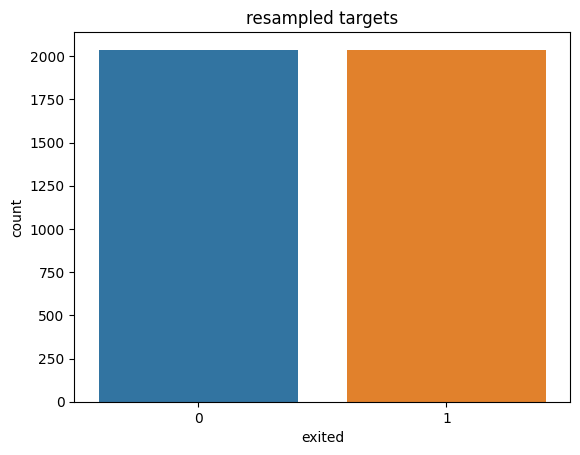

In [19]:
sns.countplot(data = df, x = 'exited')
plt.title('resampled targets')
plt.show()

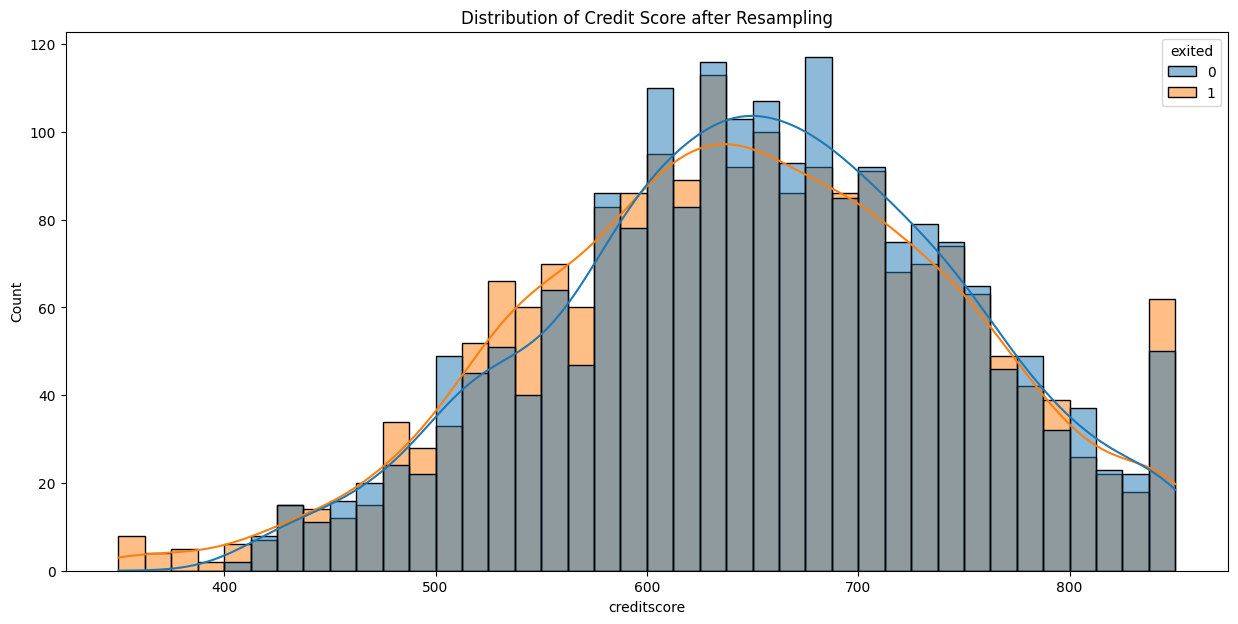

In [20]:
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'creditscore', hue = 'exited', kde= True, bins = 40 )
plt.title('Distribution of Credit Score after Resampling')
plt.show()

In [21]:
y = df['exited']
x = df.drop(columns = 'exited')

In [22]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(x, y)
imp = rf.feature_importances_
features = pd.DataFrame(imp, index = x.columns, columns = ['importance']).sort_values('importance', ascending = False)


In [23]:
features

,importance
age,0.454431
numofproducts,0.269467
isactivemember,0.094838
balance,0.076215
geography,0.033172
gender,0.031082
creditscore,0.016545
estimatedsalary,0.015398
tenure,0.007720
hascrcard,0.001131


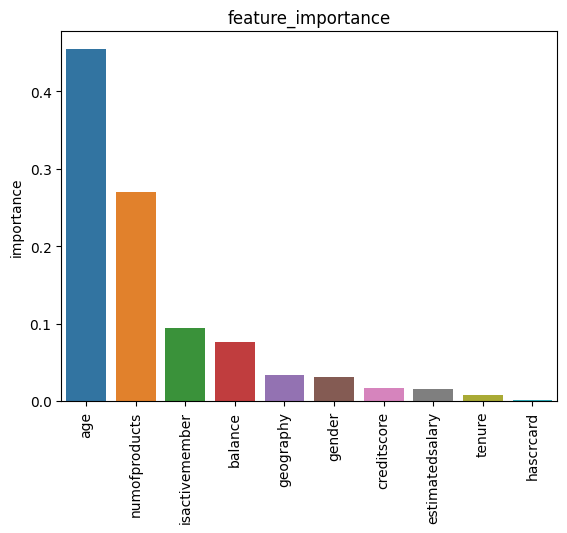

In [24]:
sns.barplot(y = features.importance, x = features.index)
plt.xticks(rotation = 90)
plt.title('feature_importance')
plt.show()

In [25]:
x.drop(columns = ['gender', 'creditscore', 'estimatedsalary', 'tenure', 'hascrcard'], inplace = True)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [27]:
rf = RandomForestClassifier(max_depth = 10, n_estimators = 500)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [28]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       626
           1       0.77      0.77      0.77       597

    accuracy                           0.78      1223
   macro avg       0.78      0.78      0.78      1223
weighted avg       0.78      0.78      0.78      1223



In [29]:
acc = accuracy_score(y_pred, y_test)
print(f"RF Accuracy: {acc*100}%")

RF Accuracy: 77.84137367130009%


In [30]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [31]:
report = classification_report(y_pred_lr, y_test)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.49      0.66      1223

    accuracy                           0.49      1223
   macro avg       0.50      0.24      0.33      1223
weighted avg       1.00      0.49      0.66      1223



C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [32]:
acc = accuracy_score(y_pred_lr, y_test)
print(f"LR Accuracy: {acc*100}%")


LR Accuracy: 48.896156991005725%
